# Candlesticks no Python
- Github: victordhn
- Twitter: victor_dhn
- [Linkedin: Victor Dahan](https://www.linkedin.com/in/victor-dahan-04392451/) 

### Libraries utilizadas:
- mplfinance
- yfinance
- datetime
- pandas
- matplotlib

In [1]:
import datetime as dt
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

# para ignorar uns warnings chatos do Jupyter
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Definir horizonte de tempo
inicio_full = input('Data de início no formato DD-MM-AAAA: ')
inicio = inicio_full.split('-')
start = dt.datetime(int(inicio[2]),int(inicio[1]),int(inicio[0]))
end = dt.datetime.now()

Data de início no formato DD-MM-AAAA: 01-06-2023


In [4]:
# Definir ativo
ticker = input('Ticker da ação (se for brasileira, usar ".SA" no final): ')
ticker = ticker.upper()
data = yf.download(ticker,start,end)
data.head();

Ticker da ação (se for brasileira, usar ".SA" no final): BBAS3.SA
[*********************100%***********************]  1 of 1 completed


In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-01,44.790001,45.029999,44.259998,44.740002,42.864319,10196900
2023-06-02,44.740002,44.740002,44.740002,44.740002,43.500610,0
2023-06-05,44.599998,45.290001,44.150002,45.020000,43.772850,13667000
2023-06-06,45.029999,46.160000,44.959999,45.540001,44.278442,11466100
2023-06-07,45.730000,45.889999,45.520000,45.520000,44.258999,11111000


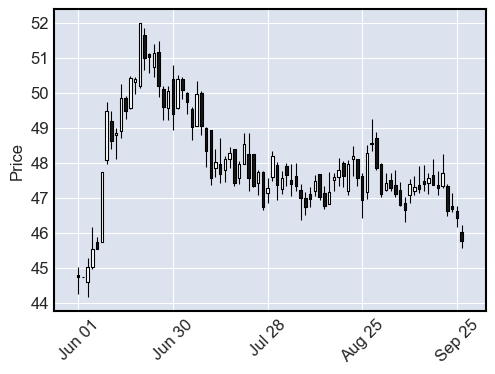

In [43]:
mpf.plot(data,type='candle', figscale=0.75)

In [7]:
# Estilos de gráfico disponíveis no pacote
print(mpf.available_styles())

['binance', 'blueskies', 'brasil', 'charles', 'checkers', 'classic', 'default', 'ibd', 'kenan', 'mike', 'nightclouds', 'sas', 'starsandstripes', 'yahoo']


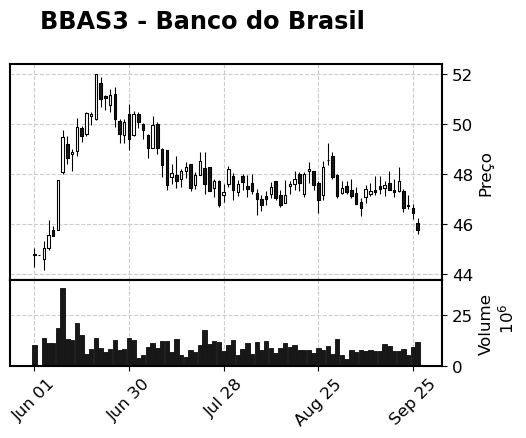

In [40]:
# Utilizando um novo estilo: vamos utilizar o estilo clássic (preto e branco)
estilo=mpf.make_mpf_style(base_mpf_style='classic')

# Plotando novo gráfico
mpf.plot(data,type='candle',style=estilo, volume=True, title="BBAS3 - Banco do Brasil", ylabel="Preço", ylabel_lower="Volume",figscale=0.75)

Adicionando indicadores financeiros.

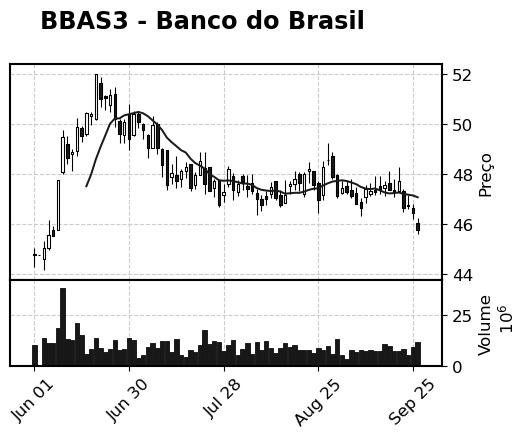

In [47]:
# Adicionando moving averages, por exemplo, é super simples: basta adicionar "mav=12" para MA de 12 meses...

estilo=mpf.make_mpf_style(base_mpf_style='classic')
mpf.plot(data,type='candle',style=estilo, volume=True, title="BBAS3 - Banco do Brasil", ylabel="Preço", ylabel_lower="Volume", figscale=0.75, mav=12)


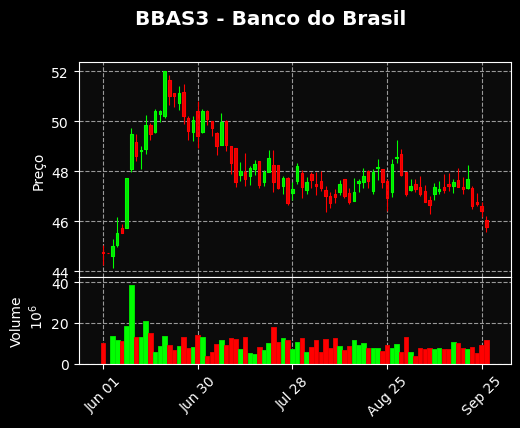

In [49]:
# Podemos também editar nosso próprio estilo

# Definindo as cores de vela positiva e negativa
cores = mpf.make_marketcolors(up='#00ff00',down='red',wick='inherit',edge='inherit',volume='in')

# Adicionamos o estilo no código
estilo=mpf.make_mpf_style(base_mpf_style='nightclouds',marketcolors=cores)
mpf.plot(data,type='candle',style=estilo, volume=True, title="BBAS3 - Banco do Brasil", ylabel="Preço", ylabel_lower="Volume",figscale=0.75)